# Tugas PageRank

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Membuat Graph
Menggunakan network x

In [ ]:
G = nx.DiGraph()

G.add_edges_from([(1, 3), (1, 5), (1, 6),(2, 8), (3, 1), (3, 5), (3, 6), (4, 8), (5, 9), (6, 2),(6, 9), (7, 4), (7,9), (8, 1), (9, 1),(9, 2),(9, 7)])



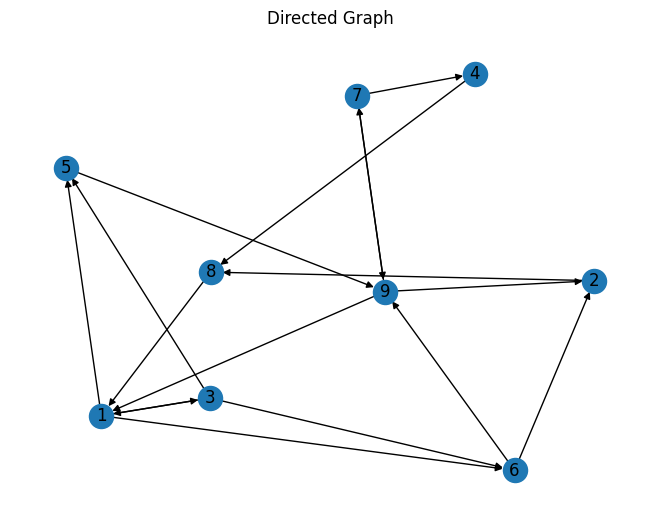

In [ ]:
nx.draw(G, with_labels=True)
plt.title('Directed Graph')
plt.show()

## Perhitungan PageRank

### Secara Manual

Perhitungan iterasi menggunakan rumus :<br>
$(1-d)/n + d * \sum pr_j/L_j$<br>
Keterangan :
- $d$ = factor damp<br>
- $n$ = jumlah node<br>
- $pr_j$ = nilai pagerank node j ke node i<br>
- $L_j$ = jumlah node keluar dari j

#### Implementasi perhitungan manual

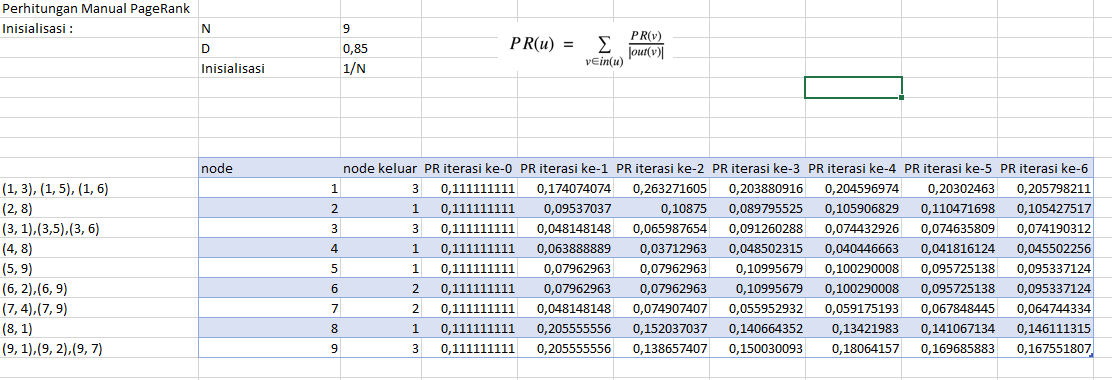

### Menggunakan NetworkX

In [ ]:
pg = nx.pagerank(G, alpha=0.85)
print("Networkx pagerank:\n")
sorted(pg.items())

Networkx pagerank:



[(1, 0.20729395202262893),
 (2, 0.10518371414099925),
 (3, 0.0753996874851362),
 (4, 0.04389153135085262),
 (5, 0.09676309522313073),
 (6, 0.09676309522313073),
 (7, 0.06405897670360203),
 (8, 0.14338020418747494),
 (9, 0.16726574366304436)]

## Text Sumarization

In [ ]:
!pip install PyPDF2
!pip install docx2txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 KB 17.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3977 sha256=51d768306bfb8ebe9789117cda8e063b6bc441f43b02e512e1cd50d5a5efb3f0
  Stored in directory: /root/.cache/pip/wheels/40/75/01/e6c444034338bde9c7947d3467807f889123465c2371e77418
Successfully built docx2txt


In [ ]:
import PyPDF2
import docx2txt
import sys
from nltk.tokenize.punkt import PunktSentenceTokenizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [ ]:
def readDoc(name):

    # Membaca type dokumen
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
        
    if choice == 1:
        f = open(name, 'r', encoding="utf8")
        document = f.read()
        f.close()
            
    elif choice == 2:
        pdfFileObj = open(name, 'rb', encoding="utf8")
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    else:
        print('Type file tidak sesuai')
        print('dokumen tidak bisa dibaca')
        document = ''
    
    return document

### Tokenisasi Dokumen

In [ ]:
def tokenize(document):
    # Memanggil semua instance sebagai sentence_tokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    
    # tokenize() method: Mengambil dokumen sebagai input dan mengembalikan list semua kalimat didalam dokumen.
    
    # Sentences adalah sebuah list yang mengandung setiap kalimat dari dokumen
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

### Read Dokumen

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
document = readDoc('/content/drive/MyDrive/prosaindata/tugas/teks.txt')
print('Panjang file ini =', end=' ')
print(len(document))

Panjang file ini = 1410


### Generate Dokumen per list

In [ ]:
sentences_list = tokenize(document)

# Menampilkan jumlah memori yang digunakan untuk list
print('Ukuran list dalam bytes: {}'.format(sys.getsizeof(sentences_list)))

# Menampilkan ukuran satu list
print('Ukuran satu list dalam bytes: {}'.format(sys.getsizeof(sentences_list[0])))

Ukuran list dalam bytes: 248
Ukuran satu list dalam bytes: 123


In [ ]:
print(type(sentences_list))
print('Ukuran list "sentences": {}'.format(len(sentences_list)))

<class 'list'>
Ukuran list "sentences": 24


### Print Dokumen



In [ ]:
for i in sentences_list:
    print(i)

Pagi buta yang dingin, membuat semua orang malas bekerja seperti biasanya.
Seperti pria paruh baya yang hanya penganguran ini.
Hari-harinya hanya bermalas-malasan.
Sementara anak semata wayang dan istrinya berusaha menghidupi keluarga.
Tak kenal lelah mencari nafkah halal kesana kemari.
Sebut saja “Pak Jum”, ia hanya membentak, meminta ini dan itu tanpa pernah member nafkah.
Anaknya saja berhenti bersekolah.
Tak punya hati sudah.
Manusia setan durjana.
Ketika terik membakar kulit pekerja keras.
Beliau duduk santai dengan asap-asap  yang meyekat perokok pasif.
Membuat hutang keluarga semakin menumpuk.
Hingga malam menyapa beliau tidak sedikitpun mencari keluarganya.
Saat istri dan anaknya kembali membawa makan, “Ini makan buat saya, kan!” membentak hingga anaknya menangis dan diam karena takut dipukuli.
Hanya diam dan sabar yang mereka lakukan setiap hari melawan ‘Pak Jum’.
Malam sunyi itu, dia marah karena tak ada uang sepeserpun di almari.
Dia mencaci dan memukuli istrinya hingga berd

### Generate term Dokumen Matriks
Menggunakan TF-IDF

In [ ]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [ ]:
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0.         0.         0.         ... 0.         0.         0.21963787]
 [0.         0.         0.         ... 0.         0.         0.27261611]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.39398336 0.         0.        ]
 [0.         0.28895568 0.         ... 0.         0.         0.19891748]]


In [ ]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T

<bound method _cs_matrix.toarray of <142x24 sparse matrix of type '<class 'numpy.float64'>'
	with 198 stored elements in Compressed Sparse Column format>>


### Menentukan Rank
untuk setiap kalimat

In [ ]:
nx_graph = nx.from_scipy_sparse_array(res_graph)

In [ ]:
ranks = nx.pagerank(nx_graph)

In [ ]:
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [ ]:
ranks = nx.pagerank(nx_graph)

# Analisis tipe data dari rank
print(type(ranks))
print('Ukuran menggunakan dictionaru pada bytes = {}'.format(sys.getsizeof(ranks)))

# print ranks
for i in ranks:
    print(i, ranks[i])

<class 'dict'>
Ukuran menggunakan dictionaru pada bytes = 1176
0 0.03973981813297351
1 0.042434390990289124
2 0.03679693273796915
3 0.04012498878114182
4 0.038031003217160506
5 0.05312810786552827
6 0.03631802550273865
7 0.03823586036427542
8 0.041666666666666664
9 0.041666666666666664
10 0.03654734789047143
11 0.03680179452428608
12 0.04032992584921935
13 0.047437561022994255
14 0.051198456589745506
15 0.044514499138710965
16 0.041593089619216934
17 0.04771376920156329
18 0.038367164471586473
19 0.044451479322959286
20 0.036499086243008315
21 0.041666666666666664
22 0.04275094545959925
23 0.0419857530745622


### Menentukan Kesimpulan
Mengambil kalimat penting yang ada pada dokumen

In [ ]:
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [ ]:
rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

temp_array = []

# Jika semua kalimat memiliki rank yang sama. Maka kalimat tersebut dianggap sama
# Mengambil kalimat manapun tidak ada masalah
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# Jika kalimat memiliki rank yang berbeda
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))
threshold = (sum(temp_array) / len(temp_array)) + 0.2
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

### Eksport kesimpulan ke file baru

In [ ]:
summary = " ".join(str(x) for x in sentence_list)
print(summary)
f = open('finalText.txt', 'a+')
f.write('\n')
f.write(summary)
f.close

Sebut saja “Pak Jum”, ia hanya membentak, meminta ini dan itu tanpa pernah member nafkah. Hanya diam dan sabar yang mereka lakukan setiap hari melawan ‘Pak Jum’. “Ayah hanya bisa meminta tak pernah bekerja! Saat istri dan anaknya kembali membawa makan, “Ini makan buat saya, kan!” membentak hingga anaknya menangis dan diam karena takut dipukuli.


<function TextIOWrapper.close()>

In [ ]:
for i in sentence_list:
    print(i)

Sebut saja “Pak Jum”, ia hanya membentak, meminta ini dan itu tanpa pernah member nafkah.
Hanya diam dan sabar yang mereka lakukan setiap hari melawan ‘Pak Jum’.
“Ayah hanya bisa meminta tak pernah bekerja!
Saat istri dan anaknya kembali membawa makan, “Ini makan buat saya, kan!” membentak hingga anaknya menangis dan diam karena takut dipukuli.
